# Sampling

We have a class imbalance problem in our dataset where most reviews are 5-stars and 1-stars which leads to model bias wanted to classify reviews into one of these two categories.

In this notebook, we will use various sampling techniques to see if we can improve our model performance.

Model we will use here logistic regression with sample_weight set to 'balanced' (LRB) since this performed the best in our previous notebook. 

Since Decision Tree with class_weight set to 'balanced' (DTB) did fairly well in the last notebook, we will also run that here.

The same dataset will be used for all models - unigram TF-IDF with max features of 10k.

We will re-run this model using the same dataset as a baseline for this notebook to compare.

Count of number of examples in each class after sampling was saved to a csv file so we can load them here and look at results.

Again, metric we are using is a harmonic mean between recall of minority classes and precision of majority class

### Sampling Techniques

* Random Under Sampling - undersampling technique to randomly remove majority class samples until our classes are balanced
* NEARMISS-2 - undersampling technique where majority class samples that are near minority classes are removed to create a more distinct border between majority and minority classes
* SMOTE - oversampling technique where new minority examples are synthesized based on nearest neighbors of minority classes

# Result

Over sampling and undersampling had little effect on logistic regression. 

However, under sampling increased our performance for decision tree by around 5%. However, because under sampling give us a resulting dataset of 12k samples (~4 % of our original size). With few training examples, I have concerns about whether this would generalizing well.

Our best results for decision tree, logistic regression is still performing at around 10% better.

In the futures, if we use under sampling, we would need to start with a bigger dataset. If we want 50k samples, would need to start with 1.25 million samples which seem impractical given my computing contraints

```
50k * 0.04 = 1.25mil
```



In [15]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import importlib
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import util.model_util as mu
import util.report_util as ru

pd.set_option('max_colwidth', 150)
%matplotlib inline
sns.set()

CONFIG_DIR = "../config"
CONFIG_FILE = f'{CONFIG_DIR}/2019-11-01-run_classifiers-sampling.csv'
REPORT_DIR = "../reports"
REPORT_FILE = f'{REPORT_DIR}/2019-11-01-run_classifiers-sampling-report.csv'
DATA_FILE = f'../dataset/feature_files/review_body-tfidf-df_default-ngram11-49784-10000-nolda.csv'

# Running Our model

To run the models again, execute this in the *tools* directory

```
python run_classifiers.py ../config/2019-11-01-run_classifiers-sampling.csv 
```

Configuration file is listed below

In [7]:
config = pd.read_csv(CONFIG_FILE).drop(["status", "status_date", "message"], axis=1)
config

,data_dir,data_file,class_column,dtype,drop_columns,model_name,sampling
0,../dataset/feature_files,review_body-tfidf-df_default-ngram11-49784-10000-nolda.csv,star_rating,NaN,"helpful_votes, total_votes, helpful_product",LRB,NaN
1,../dataset/feature_files,review_body-tfidf-df_default-ngram11-49784-10000-nolda.csv,star_rating,NaN,"helpful_votes, total_votes, helpful_product",DTB,NaN
2,../dataset/feature_files,review_body-tfidf-df_default-ngram11-49784-10000-nolda.csv,star_rating,NaN,"helpful_votes, total_votes, helpful_product",LRB,smote
3,../dataset/feature_files,review_body-tfidf-df_default-ngram11-49784-10000-nolda.csv,star_rating,NaN,"helpful_votes, total_votes, helpful_product",DTB,smote
4,../dataset/feature_files,review_body-tfidf-df_default-ngram11-49784-10000-nolda.csv,star_rating,NaN,"helpful_votes, total_votes, helpful_product",LRB,random_under_sampling
5,../dataset/feature_files,review_body-tfidf-df_default-ngram11-49784-10000-nolda.csv,star_rating,NaN,"helpful_votes, total_votes, helpful_product",DTB,random_under_sampling
6,../dataset/feature_files,review_body-tfidf-df_default-ngram11-49784-10000-nolda.csv,star_rating,NaN,"helpful_votes, total_votes, helpful_product",LRB,nearmiss-2
7,../dataset/feature_files,review_body-tfidf-df_default-ngram11-49784-10000-nolda.csv,star_rating,NaN,"helpful_votes, total_votes, helpful_product",DTB,nearmiss-2


# Sampling Distribution

Before we look at results, let's look at the original distribution of of samples

In [16]:
data = pd.read_csv(f'{report.head(1).data_dir}/{report.head(1).data_file}')

In [19]:
grouped_count = data[["star_rating", "helpful_product"]].groupby("star_rating").count()
grouped_count

,helpful_product
star_rating,
1,6939
2,3226
3,4669
4,8410
5,26540


In [46]:
grouped_count = grouped_count.rename({"helpful_product": "original"}, axis=1)

In [57]:
def plot_distribution(name: str, data: pd.DataFrame):
    f, a = plt.subplots(1, 1, figsize=(20, 5))
    grouped_count.plot(kind='bar', ax=a, alpha=0.5)

    _ = data.plot(kind='bar', ax=a, color='orange', alpha=0.5)

## Undersampling
### Random Undersampling

Our sample distribution is even after under sampling. However, because we only had about 2500 Star-2 reviews to begin with, this reduced all classes to only have around 2500 entires giving us only 12k samples to train with

In [52]:
rus = pd.read_csv('../reports/review_body-tfidf-df_default-ngram11-49784-10000-nolda-histogram-random_under_sampling.csv')
rus = rus.set_index("star_rating").rename({"index": "Random Under Sampling"}, axis=1)
rus

,Random Under Sampling
star_rating,
1,2420
2,2420
3,2420
4,2420
5,2420


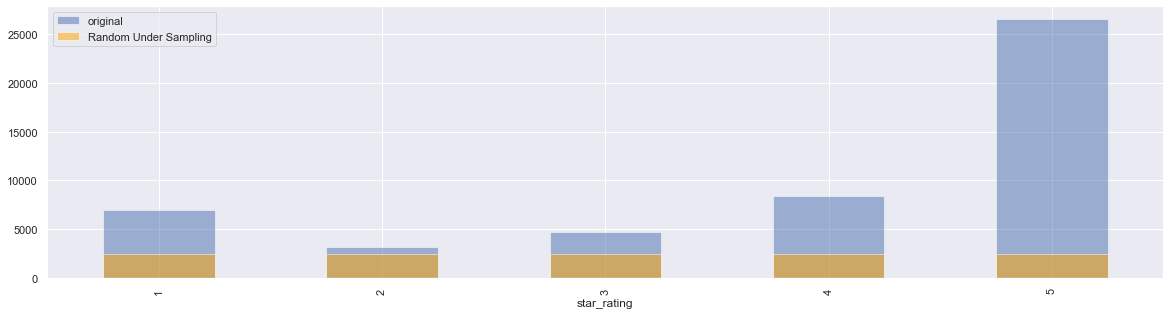

In [56]:
plot_distribution("Random Under Sampling", rus)

# Nearmiss-2

Again, nearmiss reduced our dataset to be about 12k because there were only about 2500 samples in the 2-star class

In [58]:
nearmiss = pd.read_csv('../reports/review_body-tfidf-df_default-ngram11-49784-10000-nolda-histogram-nearmiss-2.csv')
nearmiss = nearmiss.set_index('star_rating').rename({"index": "Nearmiss"}, axis=1)
nearmiss

,Nearmiss
star_rating,
1,2420
2,2420
3,2420
4,2420
5,2420


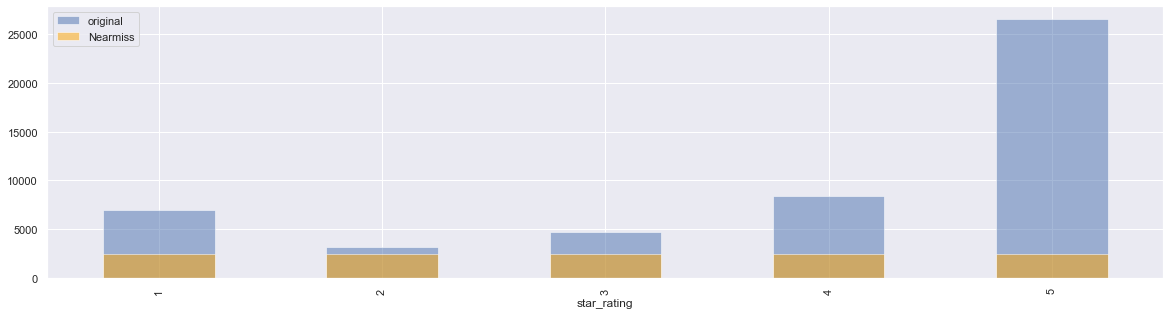

In [59]:
plot_distribution("Nearmiss", nearmiss)

## SMOTE

Since SMOTE over samples the minority class. The resulting distribution gives us about 20k per class resulting is near 100k samples in our dataset

In [61]:
smote = pd.read_csv('../reports/review_body-tfidf-df_default-ngram11-49784-10000-nolda-histogram-smote.csv')
smote = smote.set_index('star_rating').rename({"index": "Nearmiss"}, axis=1)
smote

,Nearmiss
star_rating,
1,19905
2,19905
3,19905
4,19905
5,19905


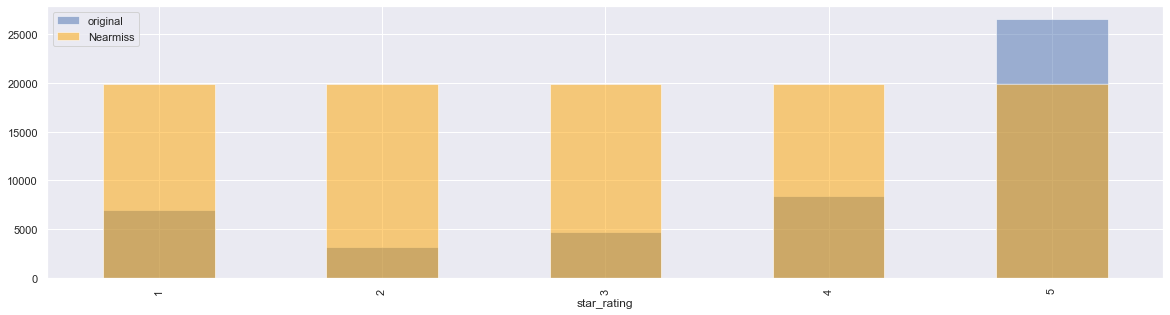

In [62]:
plot_distribution("SMOTE", smote)

# Results

Over sampling and under-sampling actually did not do as well as no sampling at all for Logistic Regression

For Decision Tree - oversampling with SMOT did .5% worse and under sampling did about 5% better than no sampling

In [91]:
report = ru.preprocess_report(pd.read_csv(REPORT_FILE))
report

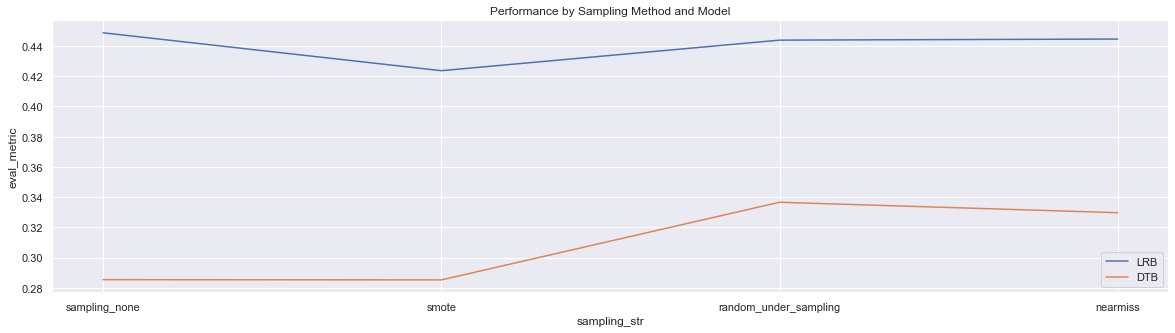

In [93]:
f, a = plt.subplots(1, 1, figsize=(20, 5))
for model in report.model_name.unique():
    sns.lineplot(data=report[report.model_name == model], 
                 x="sampling_str", y='eval_metric', label=model, sort=False)
_ = plt.title("Performance by Sampling Method and Model")

In [94]:
report[["model_name", "sampling_str", "eval_metric"]].sort_values("model_name")

,model_name,sampling_str,eval_metric
1,DTB,sampling_none,0.285427
3,DTB,smote,0.285273
5,DTB,random_under_sampling,0.336634
7,DTB,nearmiss,0.329732
0,LRB,sampling_none,0.448756
2,LRB,smote,0.423700
4,LRB,random_under_sampling,0.443906
6,LRB,nearmiss,0.444631


In [96]:
import json

print(report[(report.model_name == 'DTB') &
                              (report.sampling_str == 'random_under_sampling')].confusion_matrix.values[0])

[[ 687  561  209  135  143]
 [ 215  253  158   93   87]
 [ 159  318  275  232  183]
 [ 182  366  363  572  620]
 [ 435  651  712 1444 3393]]


In [103]:
cols = ["model_name", "eval_metric"]
cols.extend([col for col in report.columns if re.search("(precision|recall)", col)])
report[((report.model_name == 'DTB') | (report.model_name == 'LRB')) &
                              (report.sampling_str == 'random_under_sampling')][cols]

,model_name,eval_metric,1_precision,1_recall,2_precision,2_recall,3_precision,3_recall,4_precision,4_recall,5_precision,5_recall,macro avg_precision,macro avg_recall,weighted avg_precision,weighted avg_recall
4,LRB,0.443906,0.610458,0.598847,0.191789,0.388337,0.233818,0.303342,0.311357,0.388493,0.847608,0.635418,0.439006,0.462887,0.623915,0.541459
5,DTB,0.336634,0.409416,0.395965,0.117729,0.313896,0.160163,0.235647,0.231018,0.271992,0.766606,0.511379,0.336986,0.345776,0.527431,0.416198
